In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def load_data(fname):
    X=[]
    Y=[]
    f = open(fname,"r")
    for i,line in enumerate(f.readlines()):
        row = line.strip()
        nrow = row.replace('\t',' ')
        row_data = nrow.split(' ')
        X.append([])
        for j in row_data[:-1]:
            X[i].append(float(j))
        Y.append(int(row_data[-1]))
    X = np.array(X)
    X0 = np.ones(len(X))
    X0 = np.array(X0).reshape(len(X),1)
    X = np.concatenate((X0,X),axis=1)
    Y = np.array(Y).reshape(len(Y),1)
    return X,Y


In [3]:
def sigmoid(s):
    return 1.0/(1.0+np.exp(-s))

In [4]:
def ErrorRate(w,x,y):
    yhat = x.dot(w)
    yhat[yhat>0] = 1
    yhat[yhat<=0] = -1
    err = np.mean(yhat!=y)
    return err

In [5]:
gd_step = 0.01
sgd_step = 0.001
T = 2000
X_train,y_train = load_data("hw3_train.dat")
X_test,y_test = load_data("hw3_test.dat")
w_gd = w_sgd =  np.zeros((X_train.shape[1],1))

In [6]:
Ein_gd = []
Ein_sgd = []

Eout_gd = []
Eout_sgd = []

In [7]:
for t in range(T):
    gd = np.mean(sigmoid(-y_train*np.dot(X_train,w_gd))*(-y_train*X_train),axis=0).reshape(X_train.shape[1],1)
    w_gd = w_gd - gd_step*gd
    Ein_gd.append(ErrorRate(w_gd,X_train,y_train))
    Eout_gd.append(ErrorRate(w_gd,X_test,y_test))
    
    i = t%len(y_train)
    sgd  = (sigmoid(-y_train[i]*np.dot(X_train[i],w_sgd))*(-y_train[i]*X_train[i])).reshape(X_train.shape[1],1)
    w_sgd = w_sgd - sgd_step*sgd
    Ein_sgd.append(ErrorRate(w_sgd,X_train,y_train))
    Eout_sgd.append(ErrorRate(w_sgd,X_test,y_test))

In [8]:
#Coursera q19, q20
print('GD Eout=',Eout_gd[-1],'SGD Eout=',Eout_sgd[-1])

GD Eout= 0.22 SGD Eout= 0.473


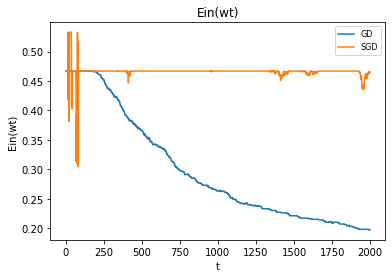

In [9]:
fig_Ein = plt.figure()
plt.title("Ein(wt)")
plt.xlabel("t")
plt.ylabel("Ein(wt)")
t = np.arange(T)
plt.plot(t,Ein_gd,label="GD")
plt.plot(t,Ein_sgd,label="SGD")
plt.legend(loc = "best",prop={'size': 8})
plt.show()

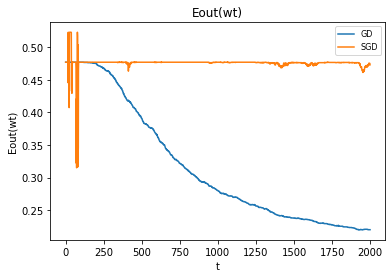

In [10]:
fig_Eout=plt.figure()
plt.title("Eout(wt)")
plt.xlabel("t")
plt.ylabel("Eout(wt)")
plt.plot(t,Eout_gd,label="GD")
plt.plot(t,Eout_sgd,label="SGD")
plt.legend(loc='best',prop={'size': 8})
plt.show()